## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.feature_selection import mutual_info_classif

## Reading the Data

In [ ]:
dataset= pd.read_excel(r"C:\Users\hmeli\OneDrive\Masaüstü\DataGlacierDataSets\Project\Healthcaredata.xlsx")
df=dataset.copy()
print("Data imported successfully!")

Data imported successfully!


## Properties of the Dataset

In [ ]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
df.tail()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3423,P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


## Dataset information

In [ ]:
#overall dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [ ]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [ ]:
#We have 3424 observations and 69 features.
df.shape

(3424, 69)

## Checking whether the dataset has any null values

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

# Basic Exploratory Data Analysis

## Examining Categorical Variables

## Demographics

In [ ]:
df["Ethnicity"].value_counts()

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64

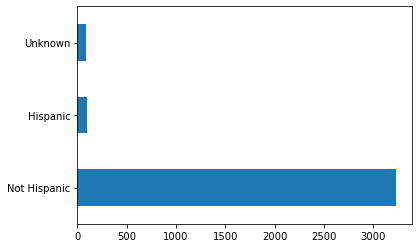

In [ ]:
df["Ethnicity"].value_counts().plot.barh();

## Conclusion: 

Not Hispanic people dominates the Ethinicty. 

In [ ]:
#Target Variable
df["Persistency_Flag"].value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

In [ ]:
df["Region"].value_counts()

Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64

<AxesSubplot:>

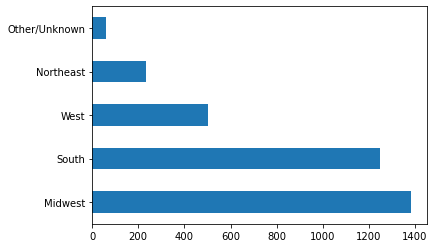

In [ ]:
df["Region"].value_counts().plot.barh()

## Conclusion: 

Midwest and South Regions have the highest proportion.

In [ ]:
df["Idn_Indicator"].value_counts()

Y    2557
N     867
Name: Idn_Indicator, dtype: int64

In [ ]:
df["Age_Bucket"].value_counts()

>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64

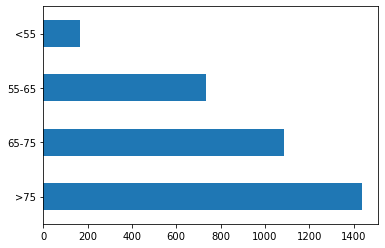

In [ ]:
df["Age_Bucket"].value_counts().plot.barh();

## Conclusion: 

Being of age > 55 can be related to have flag_persistecy.

In [ ]:
df["Race"].value_counts()

Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64

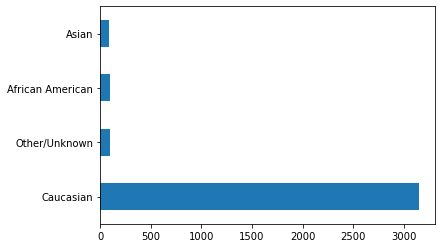

In [ ]:
df["Race"].value_counts().plot.barh();

## Conclusion: 

The rate of being from "Caucasion" is higher. So, being caucasion can affect flag_persistency (target variable).

In [ ]:
df["Gender"].value_counts()

Female    3230
Male       194
Name: Gender, dtype: int64

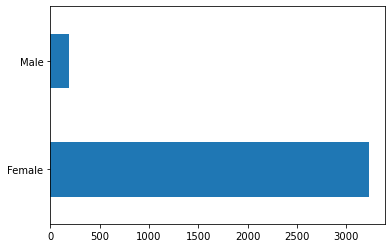

In [ ]:
df["Gender"].value_counts().plot.barh();

## Conclusion: 

Being female can be highly related with flag_persistency.

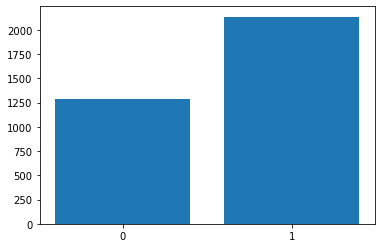

In [ ]:
# Checking the ratio of the target variable (Persistency_Flag)

plt.bar(['0', '1'], df['Persistency_Flag'].value_counts(ascending=True))
plt.show()

 ## Gender wise analysis

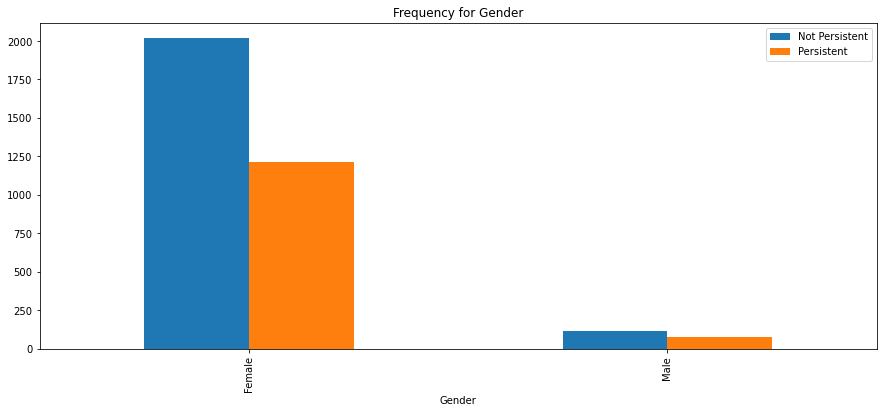

In [ ]:
pd.crosstab(df['Gender'], df['Persistency_Flag']).plot(kind='bar', figsize=(15, 6))
plt.title('Frequency for Gender')
plt.xlabel('Gender')
plt.legend(['Not Persistent', 'Persistent'])
plt.show()

## Count_Of_Risks and Percictency_Flag Relation:

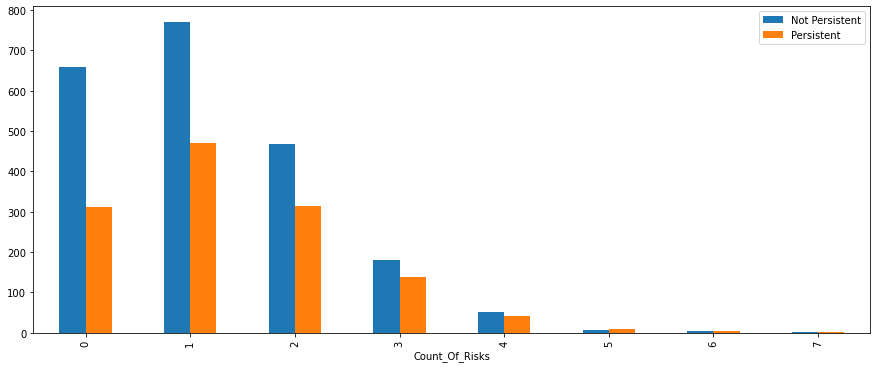

In [ ]:
pd.crosstab(df['Count_Of_Risks'], df['Persistency_Flag']).plot(kind='bar', figsize=(15, 6))
plt.legend(['Not Persistent', 'Persistent'])
plt.show()

## Region wise Analysis

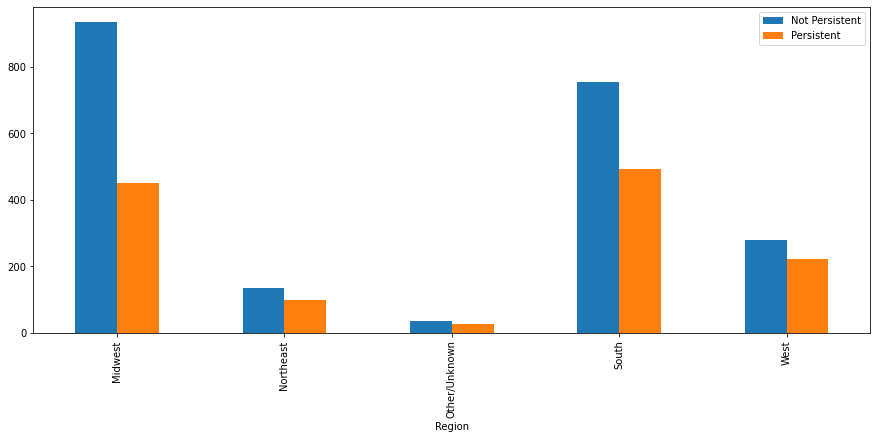

In [ ]:
pd.crosstab(df['Region'], df['Persistency_Flag']).plot(kind='bar', figsize=(15, 6))
plt.legend(['Not Persistent', 'Persistent'])
plt.show()

C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hmeli\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.7% of the points

<AxesSubplot:xlabel='Region', ylabel='Dexa_Freq_During_Rx'>

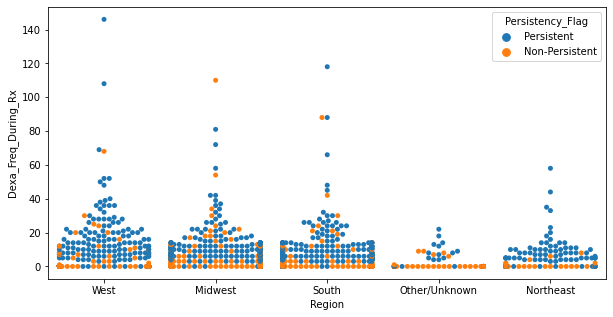

In [ ]:
plt.figure(figsize=(10, 5))
sns.swarmplot(x=df["Region"], y="Dexa_Freq_During_Rx", hue="Persistency_Flag", data=df)

# Provider Attributes

##  Ntm Speciality is  the specialty of the HCP that prescribed the NTM Rx.

In [ ]:
df["Ntm_Speciality"].value_counts()

GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
OTOLARYNGOLOGY                                                      14
HEMATOLOGY & ONCOLOGY                                               14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                                11
PULMON

In [ ]:
df["Ntm_Specialist_Flag"].value_counts()

Others        2013
Specialist    1411
Name: Ntm_Specialist_Flag, dtype: int64

In [ ]:
df["Ntm_Speciality_Bucket"].value_counts()

OB/GYN/Others/PCP/Unknown    2104
Endo/Onc/Uro                  716
Rheum                         604
Name: Ntm_Speciality_Bucket, dtype: int64

## Conclusion: 

General Practitioner, Rheumatology, Endocrinology and Oncology specialists prescribed the NTM Rx most. 

## Clinical Factors

In [ ]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


## Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate).

In [ ]:
df["Risk_Segment_Prior_Ntm"].value_counts()

VLR_LR    1931
HR_VHR    1493
Name: Risk_Segment_Prior_Ntm, dtype: int64

In [ ]:
df["Risk_Segment_During_Rx"].value_counts()

Unknown    1497
HR_VHR      965
VLR_LR      962
Name: Risk_Segment_During_Rx, dtype: int64

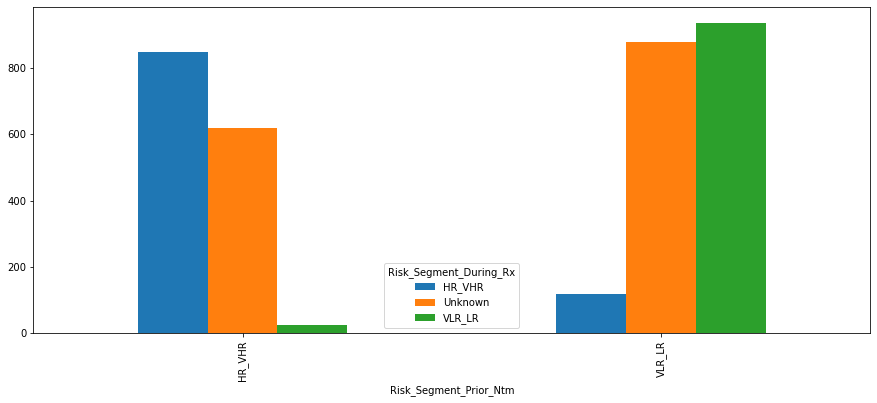

In [ ]:
pd.crosstab(df["Risk_Segment_Prior_Ntm"], df["Risk_Segment_During_Rx"]).plot(kind='bar', figsize=(15, 6))
plt.show()

## Change in Risk Segment before starting with any therapy and after receiving therapy

In [ ]:
df["Change_Risk_Segment"].value_counts()

Unknown      2229
No change    1052
Worsened      121
Improved       22
Name: Change_Risk_Segment, dtype: int64

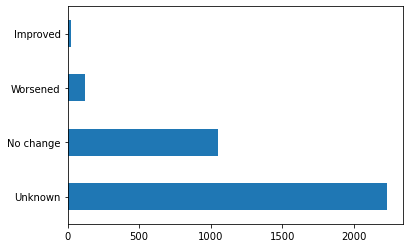

In [ ]:
df["Change_Risk_Segment"].value_counts().plot.barh();

## Conclusion: 

The ratio of the patients which are stable is much more higher than of the ratio of the worsened and improved patients.

In [ ]:
df["Gluco_Record_Prior_Ntm"].value_counts()

N    2619
Y     805
Name: Gluco_Record_Prior_Ntm, dtype: int64

In [ ]:
df["Gluco_Record_During_Rx"].value_counts()

N    2522
Y     902
Name: Gluco_Record_During_Rx, dtype: int64

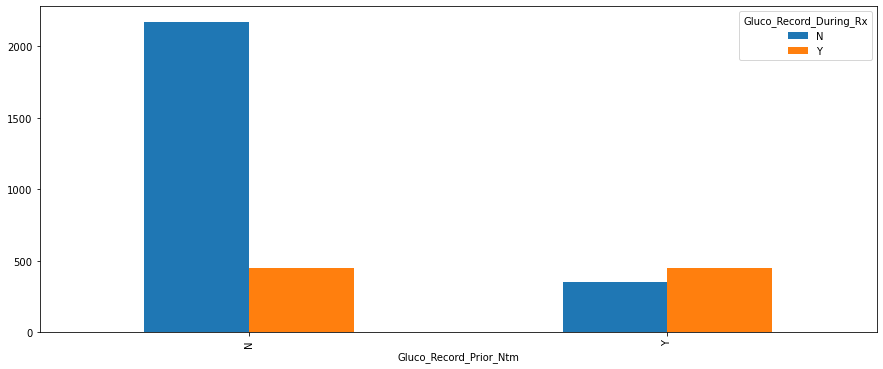

In [ ]:
pd.crosstab(df["Gluco_Record_Prior_Ntm"], df["Gluco_Record_During_Rx"]).plot(kind='bar', figsize=(15, 6))
plt.show()

## Dexa

NTM - Dexa Scan Frequency: Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate).

NTM - Dexa Scan Recency: Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable).

Dexa During Therapy: Flag indicating if the patient had a Dexa Scan during their first continuous therapy.

In [ ]:
df["Dexa_Freq_During_Rx"].value_counts()

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
2        24
1        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
21        7
17        7
28        7
30        7
36        5
32        3
34        3
19        3
42        3
39        2
58        2
48        2
88        2
25        2
52        2
69        1
37        1
45        1
27        1
29        1
33        1
35        1
23        1
68        1
146       1
118       1
110       1
108       1
72        1
66        1
54        1
50        1
44        1
40        1
38        1
81        1
Name: Dexa_Freq_During_Rx, dtype: int64

In [ ]:
df["Dexa_During_Rx"].value_counts()

N    2488
Y     936
Name: Dexa_During_Rx, dtype: int64

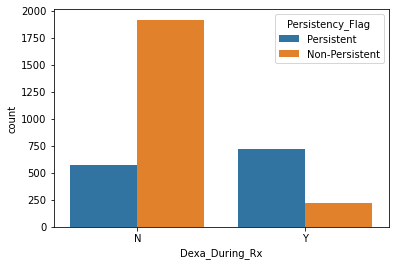

In [ ]:
subplt1 = sns.countplot(x=df["Dexa_During_Rx"], hue="Persistency_Flag", data=df)

## Conclusion: The number of patients without having Dexa scan is higher. 

## Fragility

NTM - Fragility Fracture Recency: Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate).

Fragility Fracture During Therapy: Flag indicating if the patient had fragility fracture  during their first continuous therapy.

In [ ]:
df["Frag_Frac_Prior_Ntm"].value_counts()

N    2872
Y     552
Name: Frag_Frac_Prior_Ntm, dtype: int64

In [ ]:
df["Frag_Frac_During_Rx"].value_counts()

N    3007
Y     417
Name: Frag_Frac_During_Rx, dtype: int64

In [ ]:
R1= df["Frag_Frac_Prior_Ntm"]
R2= df["Frag_Frac_During_Rx"]
mycrosstable=pd.crosstab(R1,R2)
mycrosstable

Frag_Frac_During_Rx,N,Y
Frag_Frac_Prior_Ntm,,
N,2691,181
Y,316,236


## Conclusion:  

The number of patients that have the fragility fracture has decreased a little. 

## T-Score:

NTM - T-Score : T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate).

Change in T Score: Change in Tscore before starting with any therapy and after receiving therapy

In [ ]:
df["Tscore_Bucket_Prior_Ntm"]

0        >-2.5
1        >-2.5
2       <=-2.5
3        >-2.5
4       <=-2.5
         ...  
3419     >-2.5
3420    <=-2.5
3421     >-2.5
3422     >-2.5
3423     >-2.5
Name: Tscore_Bucket_Prior_Ntm, Length: 3424, dtype: object

In [ ]:
df["Tscore_Bucket_Prior_Ntm"].value_counts()

>-2.5     1951
<=-2.5    1473
Name: Tscore_Bucket_Prior_Ntm, dtype: int64

<AxesSubplot:>

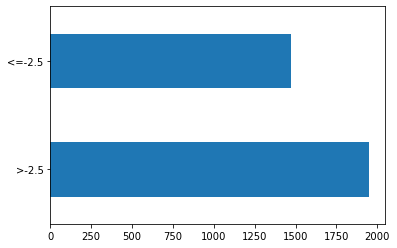

In [ ]:
df["Tscore_Bucket_Prior_Ntm"].value_counts().plot.barh()

In [ ]:
df["Tscore_Bucket_During_Rx"].value_counts()

Unknown    1497
<=-2.5     1017
>-2.5       910
Name: Tscore_Bucket_During_Rx, dtype: int64

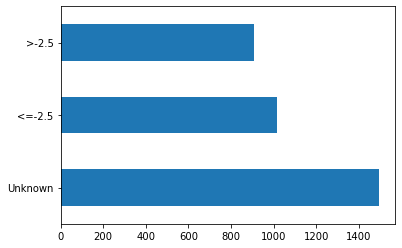

In [ ]:
df["Tscore_Bucket_During_Rx"].value_counts().plot.barh();

In [ ]:
df["Change_T_Score"].value_counts()

No change    1660
Unknown      1497
Worsened      173
Improved       94
Name: Change_T_Score, dtype: int64

<AxesSubplot:>

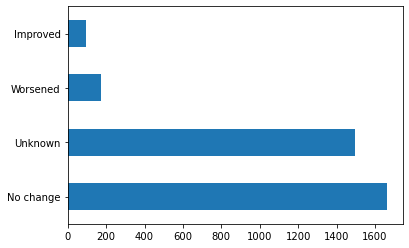

In [ ]:
df["Change_T_Score"].value_counts().plot.barh()

## Conclusion on T-score: 

Tscores with "<=-2.5" and ">-2.5" have decresed. 

## Injectible Experience:

NTM - Injectable Experience: Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx.

In [ ]:
df["Injectable_Experience_During_Rx"].value_counts()

Y    3056
N     368
Name: Injectable_Experience_During_Rx, dtype: int64

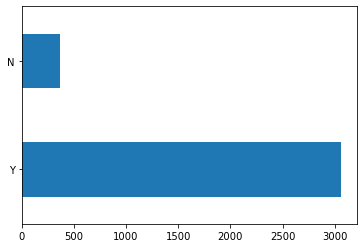

In [ ]:
df["Injectable_Experience_During_Rx"].value_counts().plot.barh();

## Examining Disease/Treatment Factors

## Comorbidity : 

The simultaneous presence of two or more diseases or medical conditions in a patient.

NTM - Comorbidity : Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied

In [ ]:
df["Comorb_Encounter_For_Screening_For_Malignant_Neoplasms"].value_counts()

N    1891
Y    1533
Name: Comorb_Encounter_For_Screening_For_Malignant_Neoplasms, dtype: int64

In [ ]:
df["Comorb_Encounter_For_Immunization"].value_counts()

N    1911
Y    1513
Name: Comorb_Encounter_For_Immunization, dtype: int64

<AxesSubplot:xlabel='Comorb_Encounter_For_Immunization', ylabel='count'>

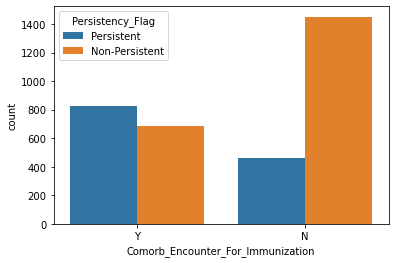

In [ ]:
sns.countplot(x=df["Comorb_Encounter_For_Immunization"], hue="Persistency_Flag", data=df)

In [ ]:
df["Comorb_Vitamin_D_Deficiency"].value_counts()

N    2331
Y    1093
Name: Comorb_Vitamin_D_Deficiency, dtype: int64

<AxesSubplot:xlabel='Comorb_Vitamin_D_Deficiency', ylabel='count'>

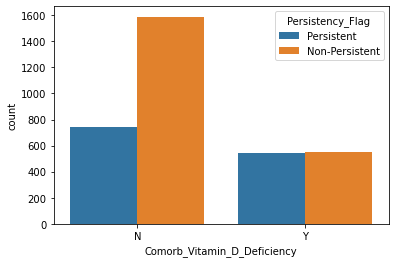

In [ ]:
sns.countplot(x=df["Comorb_Vitamin_D_Deficiency"], hue="Persistency_Flag", data=df)

In [ ]:
df["Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx"].value_counts()

N    2072
Y    1352
Name: Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx, dtype: int64

In [ ]:
df["Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified"].value_counts()

N    2425
Y     999
Name: Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified, dtype: int64

In [ ]:
df["Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx"].value_counts()

N    2633
Y     791
Name: Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx, dtype: int64

In [ ]:
df["Comorb_Long_Term_Current_Drug_Therapy"].value_counts()

N    2607
Y     817
Name: Comorb_Long_Term_Current_Drug_Therapy, dtype: int64

<AxesSubplot:xlabel='Comorb_Long_Term_Current_Drug_Therapy', ylabel='count'>

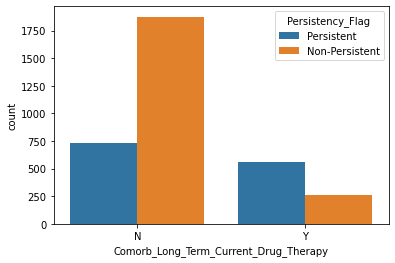

In [ ]:
sns.countplot(x=df["Comorb_Long_Term_Current_Drug_Therapy"], hue="Persistency_Flag", data=df)

In [ ]:
df["Comorb_Dorsalgia"].value_counts()

N    2645
Y     779
Name: Comorb_Dorsalgia, dtype: int64

In [ ]:
df["Comorb_Personal_History_Of_Other_Diseases_And_Conditions"].value_counts()

N    2747
Y     677
Name: Comorb_Personal_History_Of_Other_Diseases_And_Conditions, dtype: int64

In [ ]:
df["Comorb_Other_Disorders_Of_Bone_Density_And_Structure"].value_counts()

N    2906
Y     518
Name: Comorb_Other_Disorders_Of_Bone_Density_And_Structure, dtype: int64

In [ ]:
df["Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias"].value_counts()

Y    1765
N    1659
Name: Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias, dtype: int64

<AxesSubplot:xlabel='Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias', ylabel='count'>

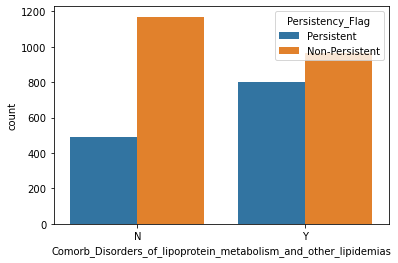

In [ ]:
sns.countplot(x=df["Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias"], hue="Persistency_Flag", data=df)

In [ ]:
df["Comorb_Osteoporosis_without_current_pathological_fracture"].value_counts()

N    2507
Y     917
Name: Comorb_Osteoporosis_without_current_pathological_fracture, dtype: int64

In [ ]:
df["Comorb_Personal_history_of_malignant_neoplasm"].value_counts()

N    2775
Y     649
Name: Comorb_Personal_history_of_malignant_neoplasm, dtype: int64

<AxesSubplot:xlabel='Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', ylabel='count'>

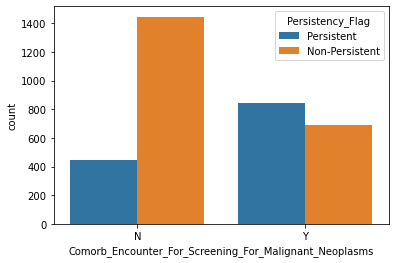

In [ ]:
sns.countplot(x=df["Comorb_Encounter_For_Screening_For_Malignant_Neoplasms"], hue="Persistency_Flag", data=df)

In [ ]:
df["Comorb_Gastro_esophageal_reflux_disease"].value_counts()

N    2794
Y     630
Name: Comorb_Gastro_esophageal_reflux_disease, dtype: int64

## Conclusion on Comorbidity

As we seen above, the number of Ns are higher than the number of Ys in  most cases.
For the following features since the number of Ns and Ys are close to each other, we think that they could affect "Persistancy_Flag":

1) Comorb_Encounter_For_Screening_For_Malignant_Neoplasms

2) Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias

3) Comorb_Encounter_For_Immunization.

## Concomitancy:

NTM - Concomitancy: Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate).

In [ ]:
df["Concom_Cholesterol_And_Triglyceride_Regulating_Preparations"].value_counts()

N    2242
Y    1182
Name: Concom_Cholesterol_And_Triglyceride_Regulating_Preparations, dtype: int64

In [ ]:
df["Concom_Narcotics"].value_counts()

N    2191
Y    1233
Name: Concom_Narcotics, dtype: int64

In [ ]:
df["Concom_Systemic_Corticosteroids_Plain"].value_counts()

N    2451
Y     973
Name: Concom_Systemic_Corticosteroids_Plain, dtype: int64

In [ ]:
df["Concom_Anti_Depressants_And_Mood_Stabilisers"].value_counts()

N    2465
Y     959
Name: Concom_Anti_Depressants_And_Mood_Stabilisers, dtype: int64

In [ ]:
df["Concom_Fluoroquinolones"].value_counts()

N    2787
Y     637
Name: Concom_Fluoroquinolones, dtype: int64

In [ ]:
df["Concom_Cephalosporins"].value_counts()

N    2821
Y     603
Name: Concom_Cephalosporins, dtype: int64

In [ ]:
df["Concom_Macrolides_And_Similar_Types"].value_counts()

N    2853
Y     571
Name: Concom_Macrolides_And_Similar_Types, dtype: int64

In [ ]:
df["Concom_Broad_Spectrum_Penicillins"].value_counts()

N    2985
Y     439
Name: Concom_Broad_Spectrum_Penicillins, dtype: int64

In [ ]:
df["Concom_Anaesthetics_General"].value_counts()

N    2927
Y     497
Name: Concom_Anaesthetics_General, dtype: int64

In [ ]:
df["Concom_Viral_Vaccines"].value_counts()

N    3071
Y     353
Name: Concom_Viral_Vaccines, dtype: int64

## Conclusion:  

As we seen above, the number of Ns are higher than the number of Ys in all cases.

## Risk Factors:

NTM - Risk Factors-Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx.

In [ ]:
df["Risk_Type_1_Insulin_Dependent_Diabetes"].value_counts()

N    3285
Y     139
Name: Risk_Type_1_Insulin_Dependent_Diabetes, dtype: int64

In [ ]:
df["Risk_Osteogenesis_Imperfecta"].value_counts()

N    3421
Y       3
Name: Risk_Osteogenesis_Imperfecta, dtype: int64

In [ ]:
df["Risk_Rheumatoid_Arthritis"].value_counts()

N    3294
Y     130
Name: Risk_Rheumatoid_Arthritis, dtype: int64

In [ ]:
df["Risk_Untreated_Chronic_Hyperthyroidism"].value_counts()

N    3422
Y       2
Name: Risk_Untreated_Chronic_Hyperthyroidism, dtype: int64

In [ ]:
df["Risk_Untreated_Chronic_Hypogonadism"].value_counts()

N    3297
Y     127
Name: Risk_Untreated_Chronic_Hypogonadism, dtype: int64

In [ ]:
df["Risk_Untreated_Early_Menopause"].value_counts()

N    3412
Y      12
Name: Risk_Untreated_Early_Menopause, dtype: int64

In [ ]:
df["Risk_Patient_Parent_Fractured_Their_Hip"].value_counts()

N    3168
Y     256
Name: Risk_Patient_Parent_Fractured_Their_Hip, dtype: int64

In [ ]:
df["Risk_Smoking_Tobacco"].value_counts()

N    2780
Y     644
Name: Risk_Smoking_Tobacco, dtype: int64

In [ ]:
df["Risk_Chronic_Malnutrition_Or_Malabsorption"].value_counts()

N    2954
Y     470
Name: Risk_Chronic_Malnutrition_Or_Malabsorption, dtype: int64

In [ ]:
df["Risk_Chronic_Liver_Disease"].value_counts()

N    3406
Y      18
Name: Risk_Chronic_Liver_Disease, dtype: int64

In [ ]:
df["Risk_Family_History_Of_Osteoporosis"].value_counts()

N    3066
Y     358
Name: Risk_Family_History_Of_Osteoporosis, dtype: int64

In [ ]:
df["Risk_Low_Calcium_Intake"].value_counts()

N    3382
Y      42
Name: Risk_Low_Calcium_Intake, dtype: int64

In [ ]:
df["Risk_Vitamin_D_Insufficiency"].value_counts()

N    1788
Y    1636
Name: Risk_Vitamin_D_Insufficiency, dtype: int64

<AxesSubplot:xlabel='Risk_Vitamin_D_Insufficiency', ylabel='count'>

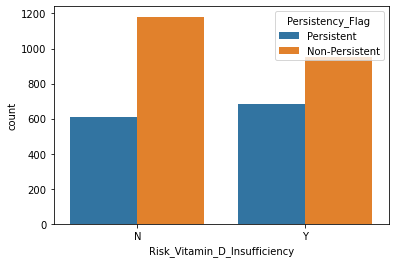

In [ ]:
sns.countplot(x=df["Risk_Vitamin_D_Insufficiency"], hue="Persistency_Flag", data=df)

In [ ]:
df["Risk_Poor_Health_Frailty"].value_counts()

N    3232
Y     192
Name: Risk_Poor_Health_Frailty, dtype: int64

In [ ]:
df["Risk_Excessive_Thinness"].value_counts()

N    3357
Y      67
Name: Risk_Excessive_Thinness, dtype: int64

In [ ]:
df["Risk_Hysterectomy_Oophorectomy"].value_counts()

N    3370
Y      54
Name: Risk_Hysterectomy_Oophorectomy, dtype: int64

In [ ]:
df["Risk_Estrogen_Deficiency"].value_counts()

N    3413
Y      11
Name: Risk_Estrogen_Deficiency, dtype: int64

In [ ]:
df["Risk_Immobilization"].value_counts()

N    3410
Y      14
Name: Risk_Immobilization, dtype: int64

In [ ]:
df["Risk_Recurring_Falls"].value_counts()

N    3355
Y      69
Name: Risk_Recurring_Falls, dtype: int64

## Conclusion on Risk Factors:  

As we seen above, the number of Ns are higher than the number of Ys in most cases. For the following features since the number of Ns and Ys are close to each other, we think that they could affect "Persistancy_Flag":

1)Risk_Vitamin_D_Insufficiency. 


In [ ]:
df["Count_Of_Risks"].value_counts()

1    1242
0     970
2     781
3     317
4      91
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64

## Adherence:

Adherence for the therapies

In [ ]:
df["Adherent_Flag"].value_counts()

Adherent        3251
Non-Adherent     173
Name: Adherent_Flag, dtype: int64

## Examining Continues Variables:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Count_Of_Risks,3424.0,1.239486,1.094914,0.0,0.0,1.0,2.0,7.0


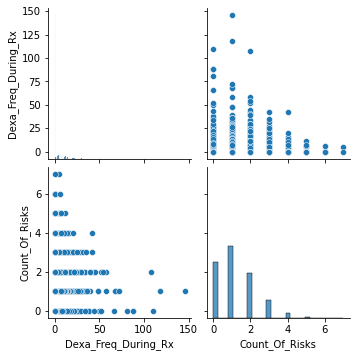

In [ ]:
sns.pairplot(df)

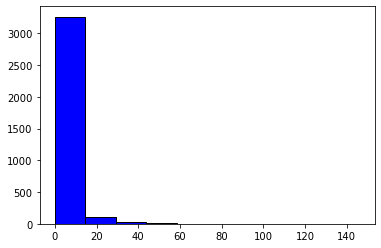

In [ ]:
plt.hist(df["Dexa_Freq_During_Rx"], color= "blue", edgecolor = 'black');

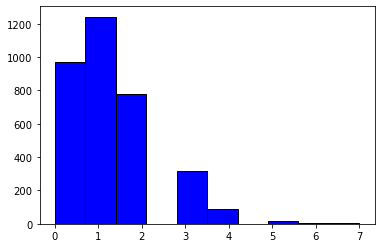

In [ ]:
plt.hist(df["Count_Of_Risks"], color= "blue", edgecolor = 'black');

## Detecting Outliers

In [ ]:
df_Dexa= df["Dexa_Freq_During_Rx"]

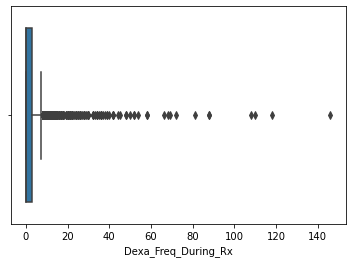

In [ ]:
sns.boxplot(x=df_Dexa);

In [ ]:
Q1=df_Dexa.quantile(0.25)
Q3=df_Dexa.quantile(0.75)
IQR=Q3-Q1

In [ ]:
lower_bound= Q1-1.5*IQR
upper_bound= Q3+ 1.5*IQR

In [ ]:
upper_bound

7.5

In [ ]:
outlier_dexa= (df_Dexa< lower_bound) | (df_Dexa> upper_bound)
outlier_dexa.head()

0    False
1    False
2    False
3    False
4    False
Name: Dexa_Freq_During_Rx, dtype: bool

In [ ]:
df[outlier_dexa]

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
32,P33,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
33,P34,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
62,P63,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
65,P66,Persistent,Female,Asian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,2
89,P90,Non-Persistent,Female,Other/Unknown,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,Y,N,N,N,N,N,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,P3385,Persistent,Female,Caucasian,Not Hispanic,South,>75,ORTHOPEDIC SURGERY,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,Y,N,N,N,N,N,N,2
3396,P3397,Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3400,P3401,Non-Persistent,Female,Caucasian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,2
3411,P3412,Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1


In [ ]:
df[outlier_dexa].index

Int64Index([  32,   33,   62,   65,   89,  101,  110,  116,  164,  180,
            ...
            3311, 3325, 3363, 3378, 3382, 3384, 3396, 3400, 3411, 3414],
           dtype='int64', length=460)

## Computing the number of outliers:

In [ ]:
type(outlier_dexa)

pandas.core.series.Series

In [ ]:
outlier_dexa=pd.DataFrame(outlier_dexa)

In [ ]:
outlier_dexa.shape

(3424, 1)

In [ ]:
n_outlier_dexa= outlier_dexa[~ ((df_Dexa< (lower_bound)) | (df_Dexa> (upper_bound)))]
n_outlier_dexa.shape

(3424, 1)

## Conclusion: We have 3424-2964= 460 outlier variables.

## Outliers for Count of Risks:


In [ ]:
df_Risks=df["Count_Of_Risks"]

<AxesSubplot:xlabel='Count_Of_Risks'>

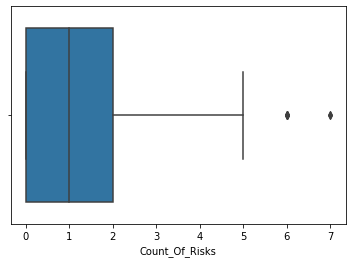

In [ ]:
sns.boxplot(x=df_Risks)

In [ ]:
Q1=df_Risks.quantile(0.25)
Q3=df_Risks.quantile(0.75)
IQR=Q3-Q1

In [ ]:
lower_bound= Q1-1.5*IQR
upper_bound= Q3+ 1.5*IQR

In [ ]:
outlier_risks= (df_Risks< lower_bound) | (df_Risks> upper_bound)
outlier_risks.head()

0    False
1    False
2    False
3    False
4    False
Name: Count_Of_Risks, dtype: bool

In [ ]:
df[outlier_risks]

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
342,P343,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,Y,N,Y,Y,N,N,N,N,N,6
817,P818,Persistent,Female,African American,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,Y,Y,N,N,N,N,N,7
1059,P1060,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,Y,Y,N,N,N,Y,7
2601,P2602,Non-Persistent,Female,Caucasian,Not Hispanic,West,65-75,RHEUMATOLOGY,Specialist,Rheum,...,N,N,Y,Y,Y,N,N,N,Y,6
2860,P2861,Non-Persistent,Male,Caucasian,Not Hispanic,Northeast,65-75,RHEUMATOLOGY,Specialist,Rheum,...,Y,N,Y,N,N,N,N,N,N,6
3045,P3046,Persistent,Female,Other/Unknown,Unknown,Midwest,55-65,RHEUMATOLOGY,Specialist,Rheum,...,Y,N,Y,N,N,N,N,N,N,6
3146,P3147,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,<55,RHEUMATOLOGY,Specialist,Rheum,...,N,Y,Y,Y,N,N,N,N,N,6
3340,P3341,Persistent,Female,Caucasian,Not Hispanic,Northeast,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,Y,N,N,N,N,N,N,N,N,6


In [ ]:
df[outlier_risks].index

Int64Index([342, 817, 1059, 2601, 2860, 3045, 3146, 3340], dtype='int64')

## Conclusion: We have 8 outlier variables.

In [ ]:
#solving the outliers for Count Of Risks
df_Risks[outlier_risks]

342     6
817     7
1059    7
2601    6
2860    6
3045    6
3146    6
3340    6
Name: Count_Of_Risks, dtype: int64

In [ ]:
upper_bound

5.0

In [ ]:
df_Risks[outlier_risks]=upper_bound

<ipython-input-133-16770f3f4266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Risks[outlier_risks]=upper_bound


In [ ]:
#checking whether we have changed successfully
df_Risks[outlier_risks]

342     5
817     5
1059    5
2601    5
2860    5
3045    5
3146    5
3340    5
Name: Count_Of_Risks, dtype: int64